# Firefox engineering build time trends

In [200]:
import pandas as pd
import seaborn as sns

In [201]:
files = ['data/nightly-{}{}.parq'.format(y, m)
         for y in (2016, 2017, 2018) 
         for m in ('01', '02', '03')]

In [202]:
df = pd.concat([pd.read_parquet(fn) for fn in files], ignore_index=True)
df.shape

(40092, 8)

In [203]:
df.head()

,changeset,changeset_desc,changeset_pushid,changeset_pushtime,bug,bug_creation_time,nightly_build_id,nightly_publish_time
0,3958782fe187026cbc3755ad6eae6920e67fa7d2,Bug 989960 - Unhandled rejections in DOM Promi...,29957,2016-01-30 17:15:45,989960.0,2014-03-31 11:45:09,20160131030347,2016-01-31 13:44:24+00:00
1,e8d8faa2595513aca6258f0d9e224f86c6ecd01e,"Bug 1241111 - Allow overriding SOURCE_REV_URL,...",29957,2016-01-30 17:15:45,1241111.0,2016-01-20 13:44:46,20160131030347,2016-01-31 13:44:24+00:00
2,62b2d7cabf94a62d5fea1836eb50f7e813dff8c1,Bug 1242667 - Remove unused MOZ_TELEMETRY_DISP...,29957,2016-01-30 17:15:45,1242667.0,2016-01-25 19:46:58,20160131030347,2016-01-31 13:44:24+00:00
3,ed69cf9c7396135de51ae9f620e851308fd4a34b,Bug 1037483 adopt microformats-shiv for microf...,29957,2016-01-30 17:15:45,1037483.0,2014-07-11 15:53:52,20160131030347,2016-01-31 13:44:24+00:00
4,96f4549cab327edecf945365a6c2637caef1eecf,Bug 1037483 replace microdata with microformat...,29957,2016-01-30 17:15:45,1037483.0,2014-07-11 15:53:52,20160131030347,2016-01-31 13:44:24+00:00


In [204]:
df['year'] = df['nightly_publish_time'].dt.year

In [205]:
df['changeset_pushtime'] = df['changeset_pushtime'].dt.tz_localize('UTC')

In [206]:
df.groupby('year').size()

year
2016    11793
2017    16167
2018    12132
dtype: int64

In [207]:
print("Number of unique builds per year")
df.groupby('year')['nightly_build_id'].nunique()

Number of unique builds per year


year
2016     85
2017     88
2018    167
Name: nightly_build_id, dtype: int64

In [208]:
df['push_to_publish'] = df['nightly_publish_time'] - df['changeset_pushtime']
df['hours'] = df['push_to_publish'].dt.total_seconds() / 3600
df['hours'].describe()

count    40092.000000
mean        11.924309
std          9.992328
min          0.910556
25%          2.797222
50%         11.264444
75%         16.618333
max         59.100556
Name: hours, dtype: float64

In [209]:
# Builds can have multiple changesets.  Changesets are all members of the same pushid.
# Take only the build time in one record for each push.
pushes = df.groupby(['year', 'changeset_pushid']).first()
groupedhours = pushes.groupby('year')['hours']

In [210]:
groupedhours.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,270.0,13.456762,9.734639,2.463333,3.048125,12.654028,21.361042,50.837778
2017,348.0,15.272981,9.664937,0.910556,10.111181,13.267500,21.227222,59.100556
2018,483.0,6.022487,6.067337,1.411389,1.935694,2.598611,8.819861,37.815278


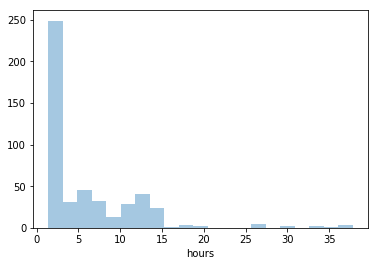

In [211]:
sns.distplot(groupedhours.get_group(2018), kde=False);

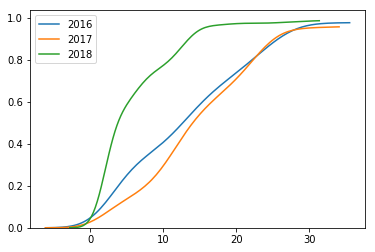

In [212]:
for year, data in groupedhours:
    sns.kdeplot(data, label=year, cumulative=True, clip=(0, 30))

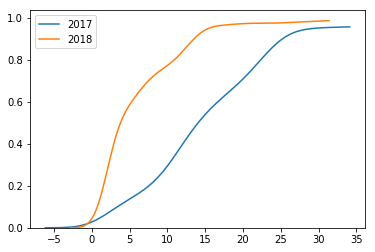

In [213]:
for year in (2017, 2018):
    data = groupedhours.get_group(year)
    sns.kdeplot(data, label=year, cumulative=True, clip=(0, 30))